In [ ]:
#Questions to answer in this project
# 1. What was the change in price of the stock over time?
# 2. What was the daily return of the stock on average?
# 3. What was the moving average of the various stocks?
# 4. What was the correlation between different stocks closing prices?
# 5. How much value do we put at risk by investing in a particular stock?
# 6. How can we attempt to predict future stock behavior?

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ('whitegrid')
%matplotlib inline

In [6]:
from pandas_datareader import data, wb
from datetime import datetime
import yfinance as yf

In [7]:
stock_list = ['GOOG', 'AAPL', 'TSLA']
for stock in stock_list:
    #This way you dont have to pull each stock's data string by string. We have to set up a global stock list dataframe.globals()[stock] sets up string name as data name
    globals()[stock] = data.DataReader(stock,'yahoo',start=datetime(2019,1,1),end=datetime(2021,1,1))

In [8]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02,505.000000
mean,1348.282903,1320.577058,1333.577882,1335.188544,1.653248e+06,1335.188544
std,203.641100,198.908436,200.951232,200.793911,7.381292e+05,200.793911
min,1047.489990,1013.536011,1016.570007,1016.059998,3.468000e+05,1016.059998
25%,1182.400024,1160.010010,1171.459961,1169.949951,1.215400e+06,1169.949951
50%,1304.300049,1281.000000,1292.890015,1295.280029,1.463600e+06,1295.280029
75%,1489.750000,1459.880005,1471.750000,1476.229980,1.825300e+06,1476.229980
max,1847.199951,1822.650024,1824.520020,1827.989990,6.207000e+06,1827.989990


In [9]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2019-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       505 non-null    float64
 1   Low        505 non-null    float64
 2   Open       505 non-null    float64
 3   Close      505 non-null    float64
 4   Volume     505 non-null    float64
 5   Adj Close  505 non-null    float64
dtypes: float64(6)
memory usage: 27.6 KB


In [10]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015
2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900,1076.280029


<AxesSubplot:xlabel='Date'>

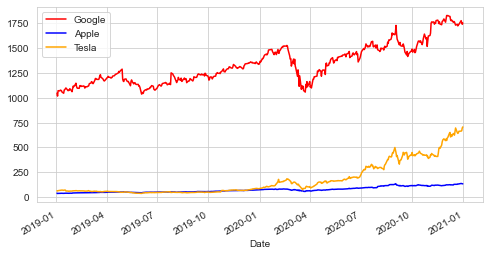

In [11]:
#Question 1 Change in stock price over time
#Adjusted close gives better idea of the overall value of stock whereas close value gives exact cash value of a share of stock at the end of trading day
GOOG['Adj Close'].plot(legend=True, figsize=(8,4),color='red',label='Google')
AAPL['Adj Close'].plot(legend=True, figsize=(8,4),color='blue',label='Apple')
TSLA['Adj Close'].plot(legend=True, figsize=(8,4),color='orange',label='Tesla')

<AxesSubplot:xlabel='Date'>

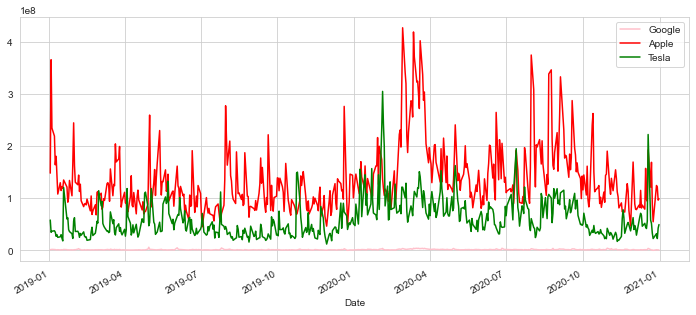

In [12]:
#Question 2 Daily return of the Stock on average
#To calculate Daily return we need to subtract opening price from closing price
#Plotting volume of stocks traded in course of 2 years can give us an idea on highs and lows
GOOG['Volume'].plot(legend=True,figsize=(12,5),color='pink',label='Google')
AAPL['Volume'].plot(legend=True,figsize=(12,5),color='red',label='Apple')
TSLA['Volume'].plot(legend=True,figsize=(12,5),color='green',label='Tesla')

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034370
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565


In [14]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


<AxesSubplot:xlabel='Date'>

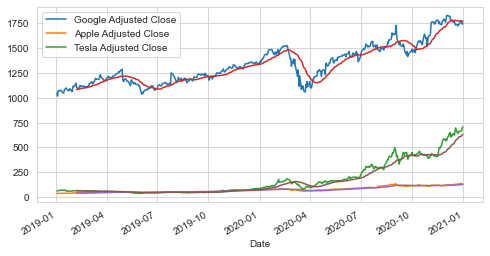

In [17]:
# 3. What was the moving average of the various stocks?
#Below is moving average for 3 stocks with span of 25 days window
GOOG['Adj Close'].plot(legend=True, figsize=(8,4),label='Google Adjusted Close')
AAPL['Adj Close'].plot(legend=True, figsize=(8,4),label='Apple Adjusted Close')
TSLA['Adj Close'].plot(legend=True, figsize=(8,4),label='Tesla Adjusted Close')
GOOG['Adj Close'].rolling(window=25).mean().plot()
AAPL['Adj Close'].rolling(window=25).mean().plot()
TSLA['Adj Close'].rolling(window=25).mean().plot()

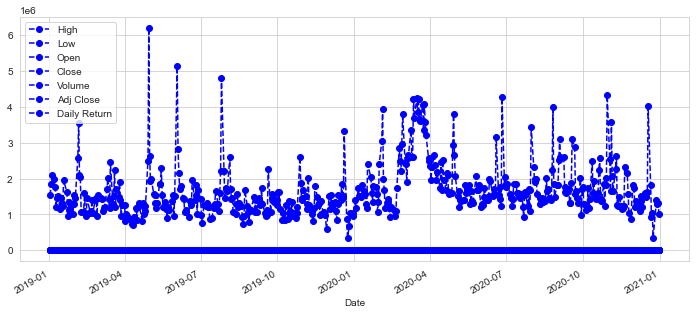

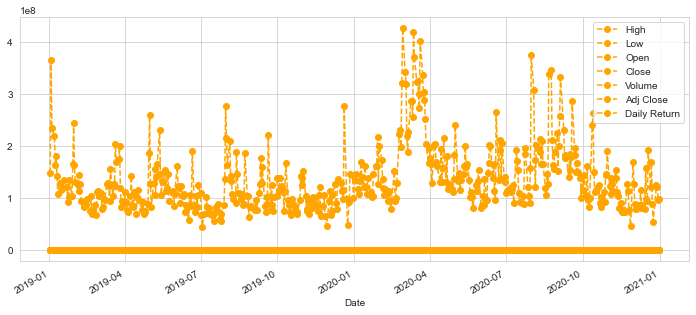

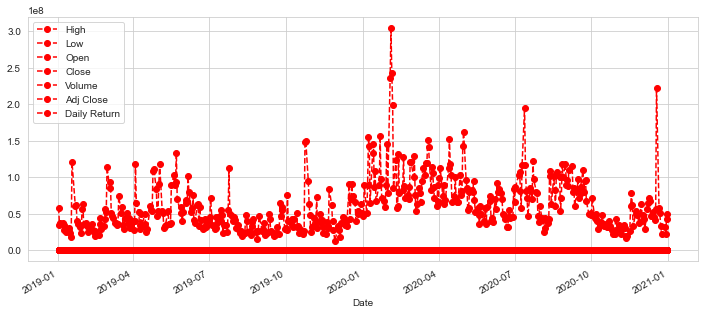

In [15]:
# 4. What was the correlation between different stocks closing prices?
#Following analysis shows changes in stock prices everyday which can give us an idea on daily fluctuations in stock prices percentage wise.

GOOG['Daily Return']=GOOG['Adj Close'].pct_change()
GOOG['Daily Return']=GOOG.plot(figsize=(12,5),legend=True,color='blue',linestyle='--',marker="o",label='Google')
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return']=AAPL.plot(figsize=(12,5),legend=True,color='orange',linestyle='--',marker='o',label='Apple')
TSLA['Daily Return']=TSLA['Adj Close'].pct_change()
TSLA['Daily Return']=TSLA.plot(figsize=(12,5),legend=True,color='red',linestyle='--',marker='o',label='Tesla')

In [16]:
technologystocklist_df = data.DataReader(['AAPL','GOOG','TSLA'],'yahoo',start=datetime(2019,1,1),end=datetime(2021,1,1))['Adj Close']

In [17]:
technologystocklist_df.head()

Symbols,AAPL,GOOG,TSLA
Date,,,
2019-01-02,38.382229,1045.849976,62.023998
2019-01-03,34.559078,1016.059998,60.071999
2019-01-04,36.034370,1070.709961,63.537998
2019-01-07,35.954170,1068.390015,66.991997
2019-01-08,36.639565,1076.280029,67.070000


In [18]:
tech_list = technologystocklist_df.pct_change()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


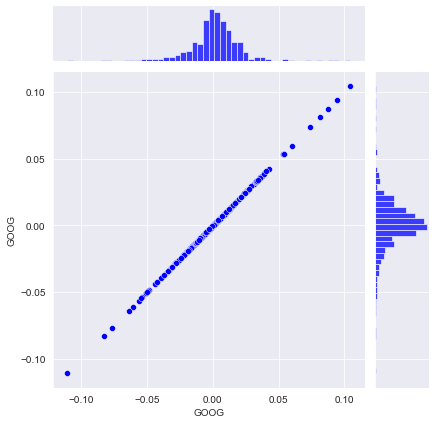

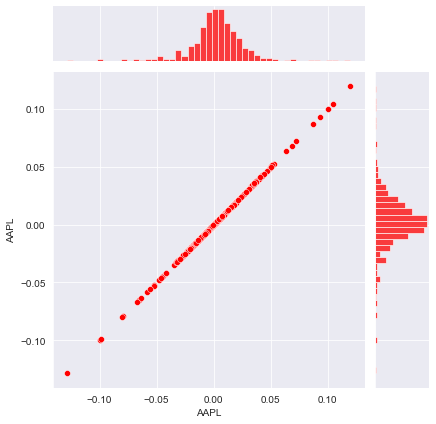

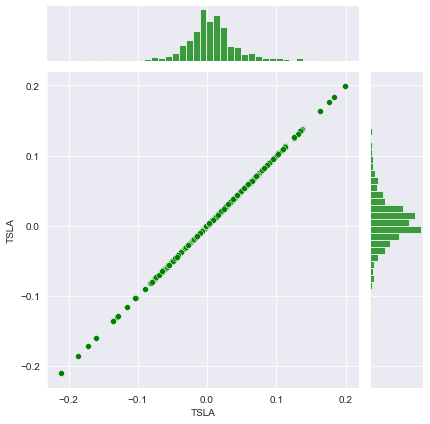

In [88]:
#
sns.jointplot('GOOG','GOOG',tech_list,kind='scatter',color='blue')
sns.jointplot('AAPL','AAPL',tech_list,kind='scatter',color='red')
sns.jointplot('TSLA','TSLA',tech_list,kind='scatter',color='green')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


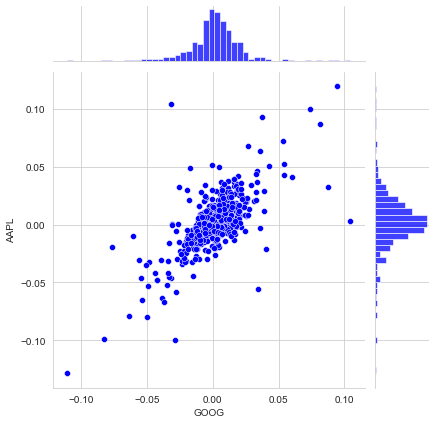

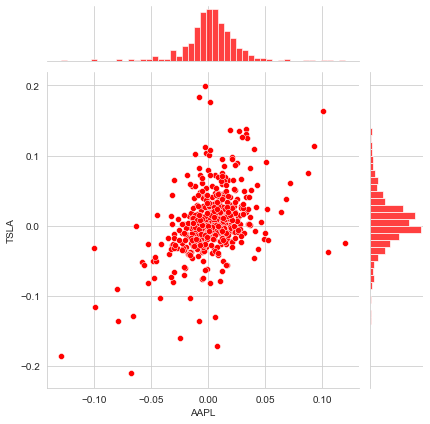

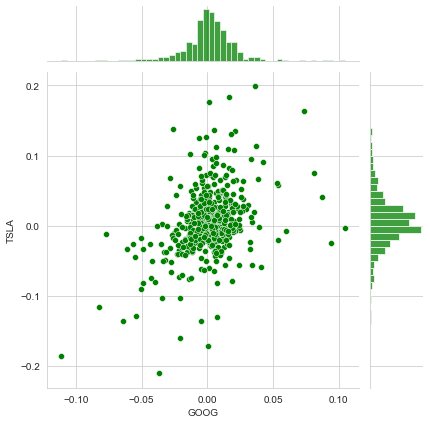

In [19]:
sns.jointplot('GOOG','AAPL',tech_list,kind='scatter',color='blue')
sns.jointplot('AAPL','TSLA',tech_list,kind='scatter',color='red')
sns.jointplot('GOOG','TSLA',tech_list,kind='scatter',color='green')

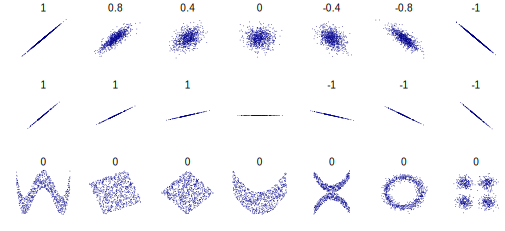

In [20]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

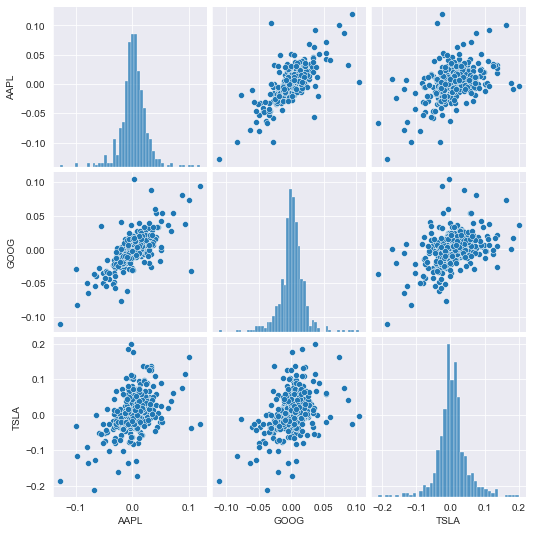

In [92]:
#Daily returns correlation between apple, google and tesla using pair plot
#https://www.tutorialspoint.com/seaborn/seaborn_pair_grid.htm
sns.pairplot(tech_list.dropna())

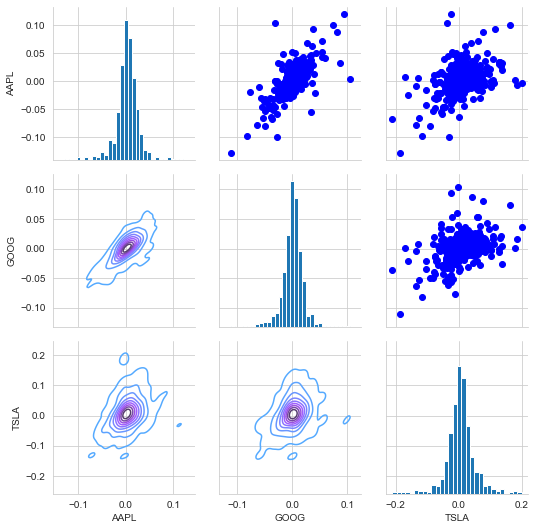

In [21]:
#A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.
#Name figure, pairplot on tech list data frame
dailyreturns_fig = sns.PairGrid(tech_list.dropna())

# Using map_upper we can specify what the upper triangle will look like.
dailyreturns_fig.map_upper(plt.scatter,color='blue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
dailyreturns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
dailyreturns_fig.map_diag(plt.hist,bins=30)

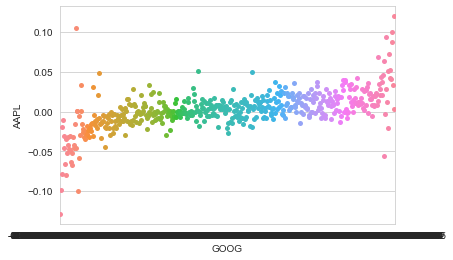

In [22]:
sns.swarmplot(x = "GOOG", y = "AAPL", data = tech_list)
plt.show()

<AxesSubplot:xlabel='Date'>

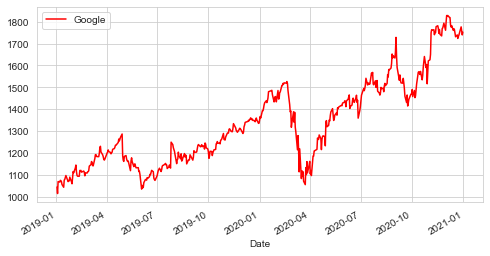

In [23]:
GOOG['Adj Close'].plot(legend=True, figsize=(8,4),color='red',label='Google')

<IPython.core.display.Javascript object>


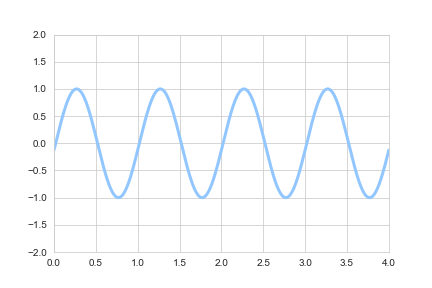

In [220]:
#Just a random sin() graph example to test out animation
#Enables interactive graphs %matplotlib.notebook line
%matplotlib notebook
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

<IPython.core.display.Javascript object>


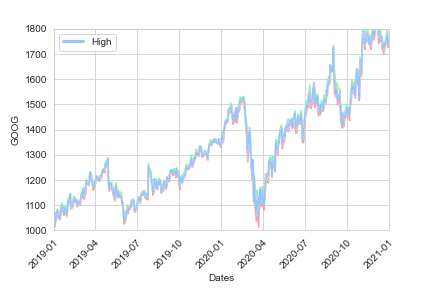

In [226]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

end = datetime(2021,1,1)
start = datetime(2019,1,1)

fig = plt.figure()
ax = plt.axes(xlim=(start,end), ylim=(1000, 1800))
line, = ax.plot([], [], lw=3)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('GOOG')
plt.xlabel('Dates')

def buildmelivechart(i):
    plt.legend(GOOG.columns)
    for i in GOOG:
        p = plt.plot(GOOG[i])
        
anim = FuncAnimation(fig, buildmelivechart,
                                frames=200, interval=20, blit=True)
plt.show()

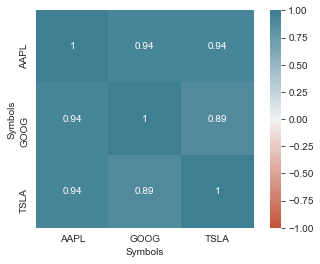

In [24]:
technology_stocklist_corr = technologystocklist_df.dropna().corr()
sns.heatmap(technology_stocklist_corr,annot=True,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
plt.show()

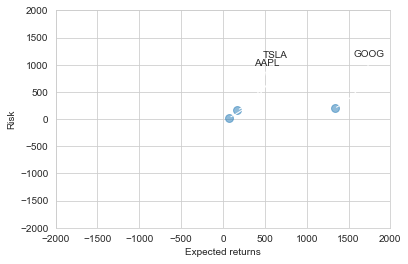

In [54]:
#Risk Analysis
rets = technologystocklist_df.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.ylim([-2000,2000])
plt.xlim([-2000,2000])
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [30]:
rets['AAPL'].quantile(0.05)

41.59602279663086

In [52]:
days = 365
dt = 1/days
mu = rets.mean()['AAPL']
sigma = rets.std()['AAPL']

In [53]:
def stock_monte_carlo(start_price,days,mu,sigma):
    #price array
    price = np.zeros(days)
    price[0] = start_price
    #Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    #price array for number of days
    for x in xrange(1,days):
        #shock calculation
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [63]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976,"AxesSubplot(0.125,0.2;0.775x0.68)"
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998,"AxesSubplot(0.125,0.2;0.775x0.68)"
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961,"AxesSubplot(0.125,0.2;0.775x0.68)"
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015,"AxesSubplot(0.125,0.2;0.775x0.68)"
2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900,1076.280029,"AxesSubplot(0.125,0.2;0.775x0.68)"


In [33]:
start_price = 1045.85

for run in xrange(10):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")

NameError: name 'xrange' is not defined

In [51]:
technologystocklist_df.head()

Symbols,AAPL,GOOG,TSLA
Date,,,
2019-01-02,38.382229,1045.849976,62.023998
2019-01-03,34.559078,1016.059998,60.071999
2019-01-04,36.034370,1070.709961,63.537998
2019-01-07,35.954170,1068.390015,66.991997
2019-01-08,36.639565,1076.280029,67.070000
